In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
SEED = 1234
random.seed(SEED)

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "huydaoquang" # username from the json file
os.environ['KAGGLE_KEY'] = "0eb162199ef4cf635c9586a2d18aaf2f" # key from the json file

In [4]:
train_path = 'data/titannic/train.csv'
test_path = 'data/titannic/test.csv'

In [5]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Exploratory Data Analysis(EDA)

Text(0.5, 1.0, 'Count Survived')

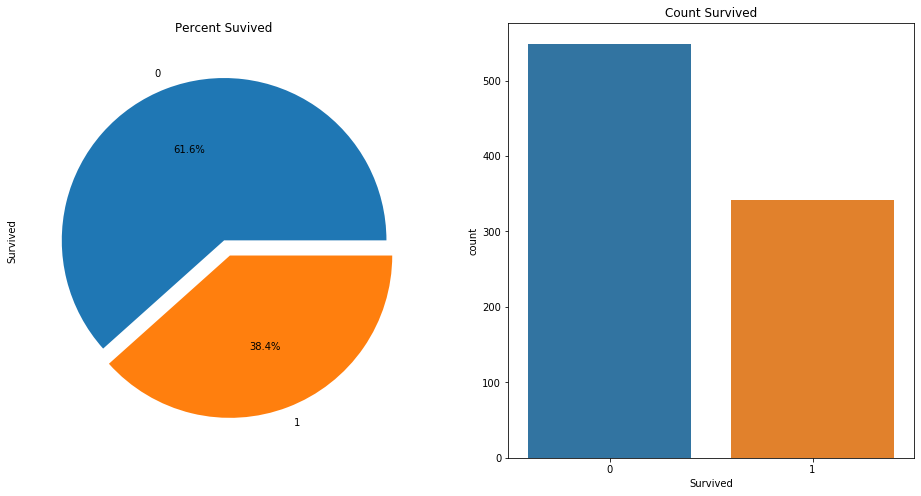

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
df_train['Survived'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],autopct='%1.1f%%')
ax[0].set_title('Percent Suvived')
sns.countplot(x = df_train['Survived'],data=df_train,ax=ax[1])
ax[1].set_title('Count Survived')

In [12]:
#observation
# onyl 38.4 % passenger survived

### Sex And Survived

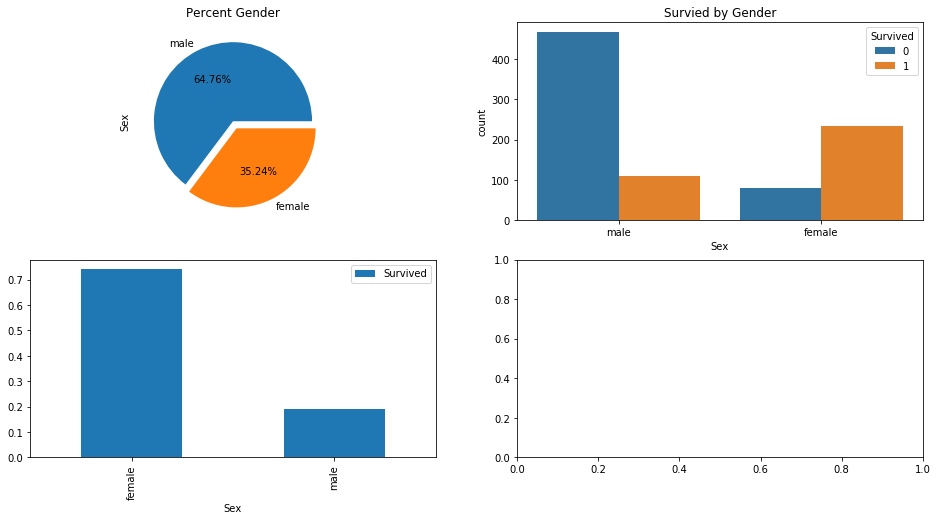

In [13]:
fig,ax = plt.subplots(2,2,figsize=(16,8))
df_train['Sex'].value_counts().plot.pie(ax=ax[0,0],explode=[0,0.1],autopct='%.2f%%')
ax[0,0].set_title('Percent Gender')
sns.countplot(x=df_train['Sex'],hue='Survived',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Survied by Gender')

df_train[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax=ax[1,0])

In [14]:
#observation
#female has large change to survive than male

### Pclass and Survived

In [15]:
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

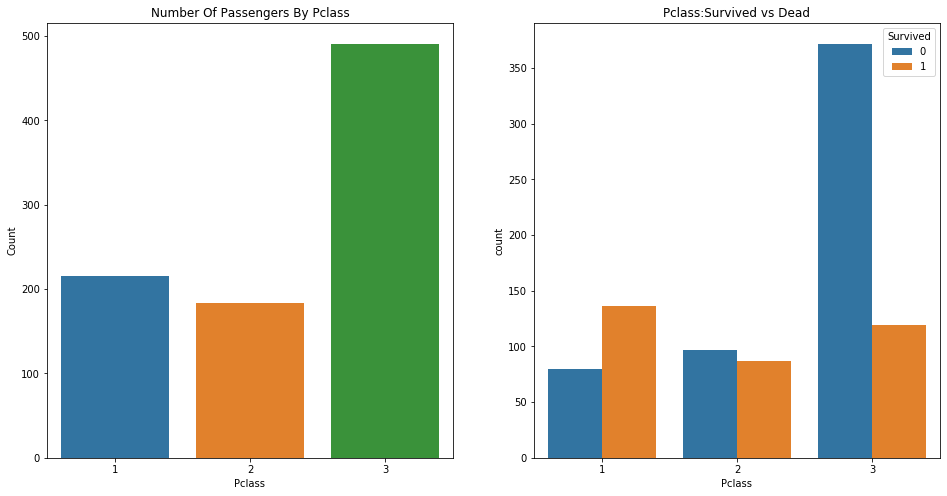

In [16]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.countplot('Pclass',data=df_train,ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_train)
ax[1].set_title('Pclass:Survived vs Dead')

In [17]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


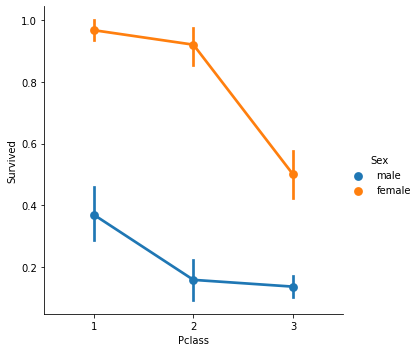

In [18]:
sns.factorplot(x='Pclass',y='Survived',hue='Sex',data=df_train)

## Age

In [19]:
print('Ordest people in titannic:',df_train['Age'].max())
print('Youngest people in titannic:',df_train['Age'].min())
print('Mean age of people in titannic:',df_train['Age'].mean())

Ordest people in titannic: 80.0
Youngest people in titannic: 0.42
Mean age of people in titannic: 29.69911764705882


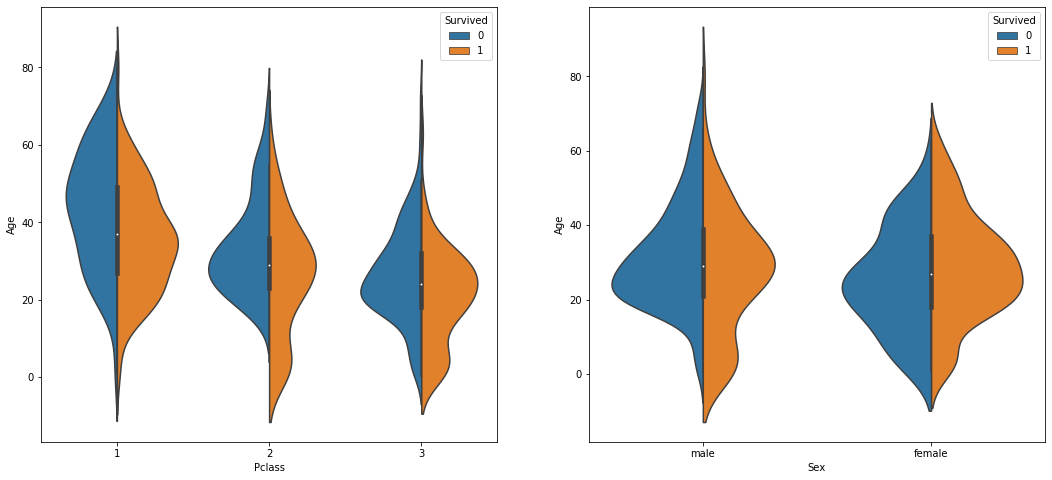

In [20]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=df_train,ax=ax[0],split=True)

sns.violinplot(x='Sex',y='Age',hue='Survived',data=df_train,ax=ax[1],split=True)

Text(0.5, 1.0, 'Distrinution of Age')

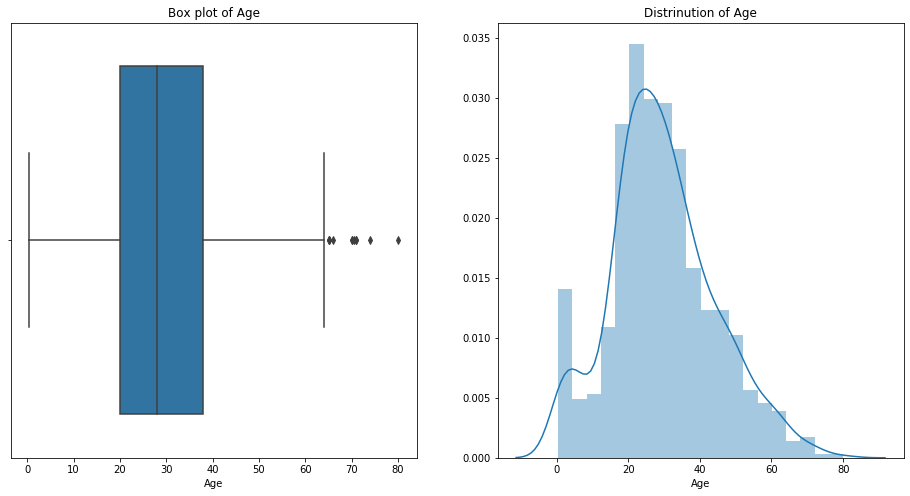

In [21]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot('Age',data=df_train,ax=ax[0])
ax[0].set_title('Box plot of Age')
sns.distplot(df_train['Age'],ax=ax[1],bins=20)
ax[1].set_title('Distrinution of Age')

### Name

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_train['Initial'] = 0
for i in df_train:
    df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [45]:
df_test['Initial'] = 0
for i in df_test:
    df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [46]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [51]:
pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [49]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [116]:
df_test['Initial'].replace(['Dona','Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [117]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.616750
Miss      21.887097
Mr        32.798677
Mrs       35.984252
Other     45.888889
Name: Age, dtype: float64

In [119]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [120]:
df_train['Age'].isna().sum()

0

In [121]:
df_test.groupby('Initial')['Age'].mean()

Initial
Master     6.948095
Miss      22.032375
Mr        32.323651
Mrs       38.500000
Other     42.750000
Name: Age, dtype: float64

In [122]:
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age']=32
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age']=39
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age']=7
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age']=22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age']=43

In [123]:
df_test['Age'].isna().sum()

0

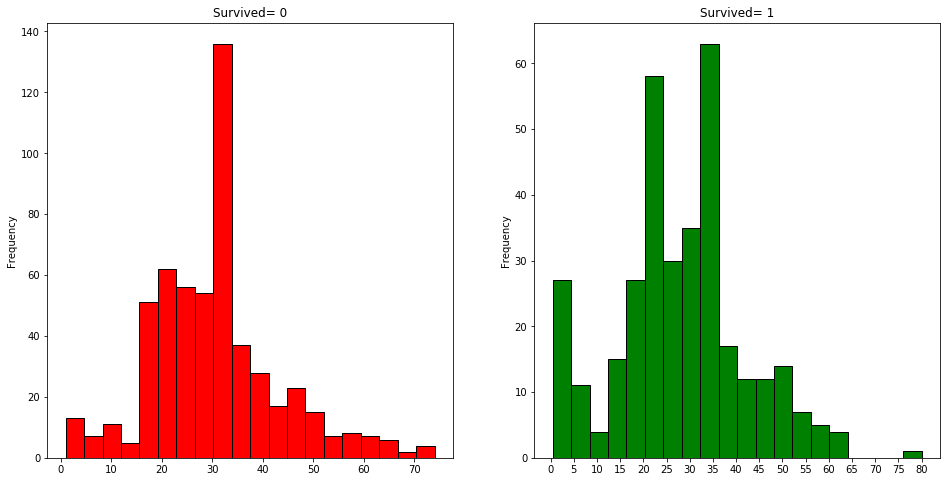

In [124]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


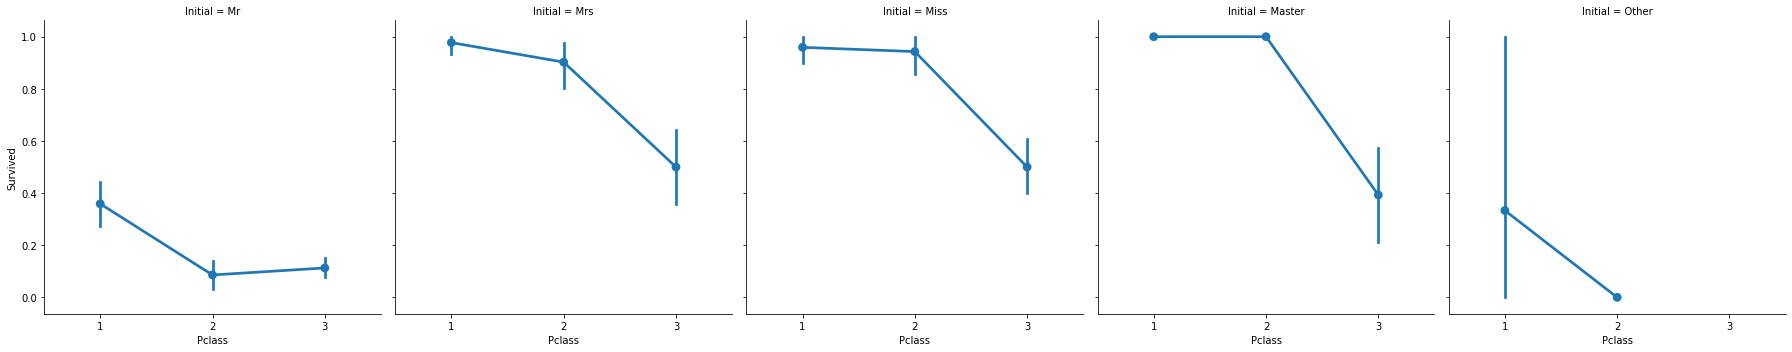

In [125]:
sns.factorplot('Pclass','Survived',col='Initial',data=df_train)

In [126]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


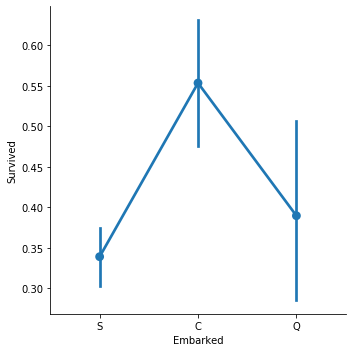

In [127]:
sns.factorplot('Embarked','Survived',data=df_train)

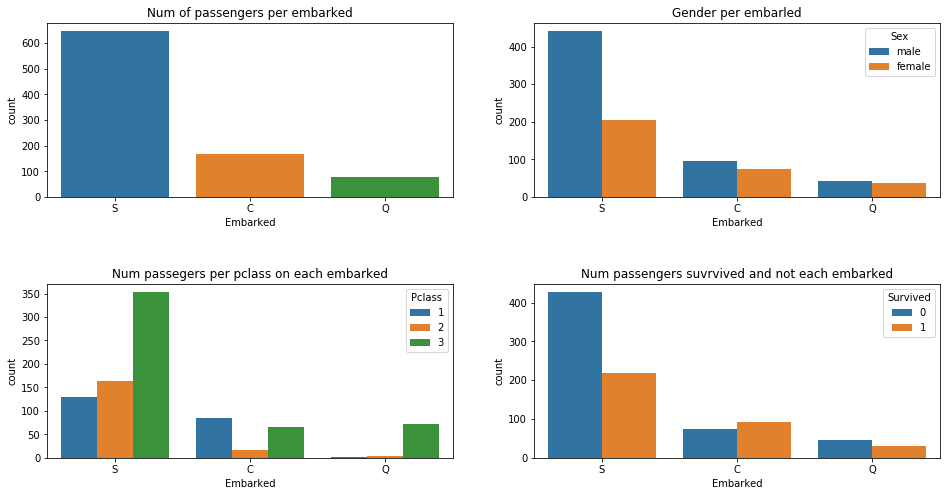

In [128]:
fig,ax = plt.subplots(2,2,figsize=(16,8))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('Num of passengers per embarked')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Gender per embarled')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Num passegers per pclass on each embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Num passengers suvrvived and not each embarked')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


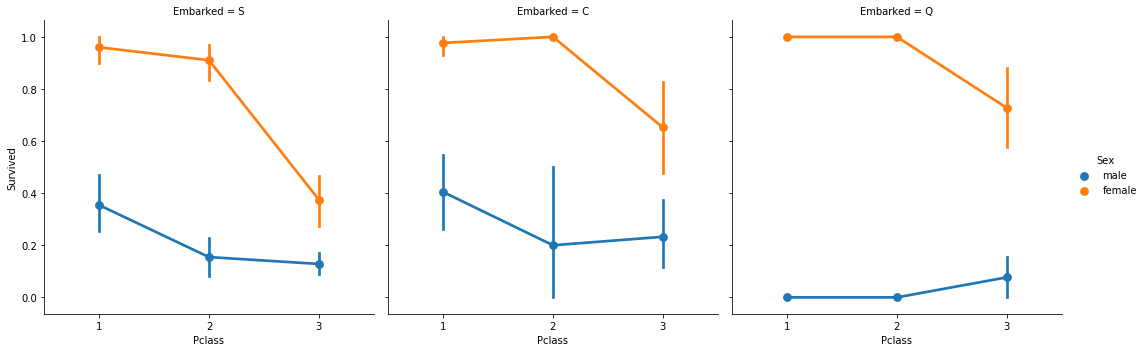

In [129]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)

In [130]:
df_train['Embarked'].fillna('S',inplace=True)

In [131]:
df_test['Embarked'].isna().sum()

0

### SibSp

In [132]:
pd.crosstab(df_train.SibSp,df_train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'Percent suvived each SibSp')

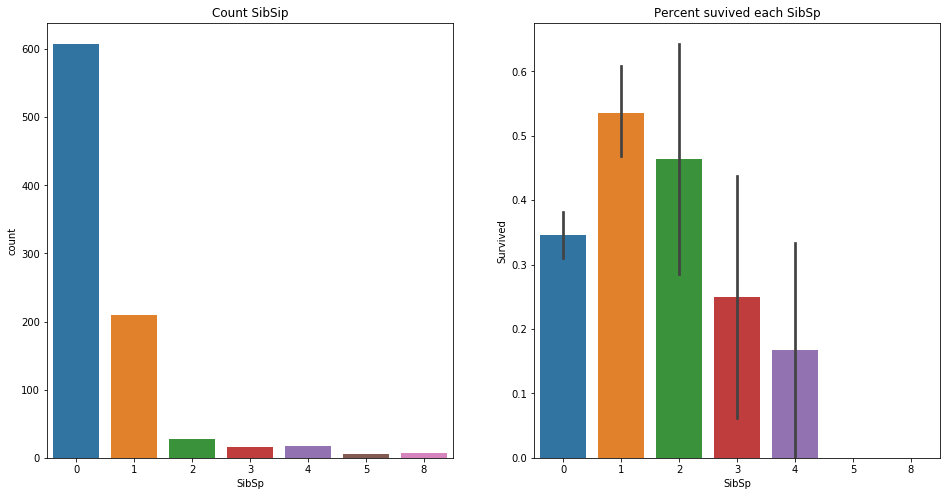

In [133]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
sns.countplot('SibSp',data=df_train,ax=ax[0])
ax[0].set_title('Count SibSip')
sns.barplot('SibSp','Survived',data=df_train,ax=ax[1])
ax[1].set_title('Percent suvived each SibSp')

### Parch

In [134]:
pd.crosstab(df_train.Parch,df_train.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


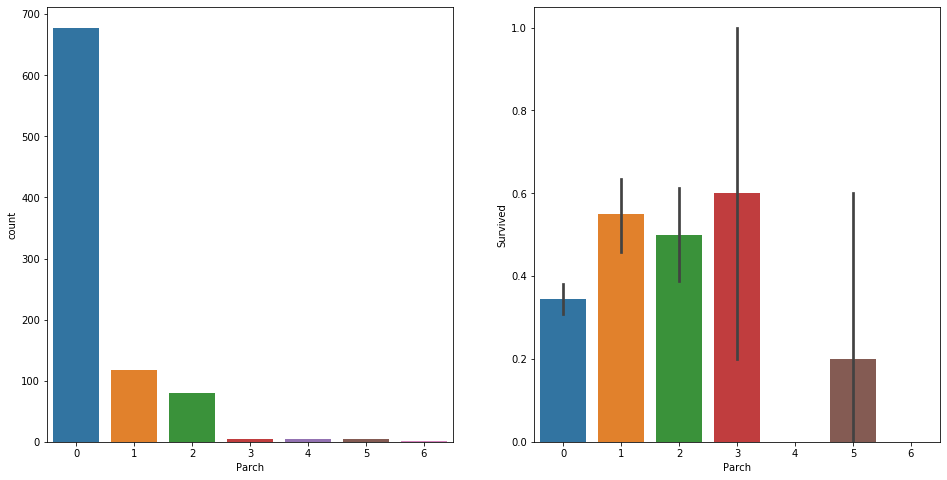

In [135]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
sns.countplot('Parch',data=df_train,ax=ax[0])
sns.barplot('Parch','Survived',data=df_train)

## Fare

In [136]:
print('Maximun fare on board: ', df_train['Fare'].max())
print('Minium fare on board: ',df_train['Fare'].min())
print('Mean fare on board: ',df_train['Fare'].mean())

Maximun fare on board:  512.3292
Minium fare on board:  0.0
Mean fare on board:  32.204207968574636


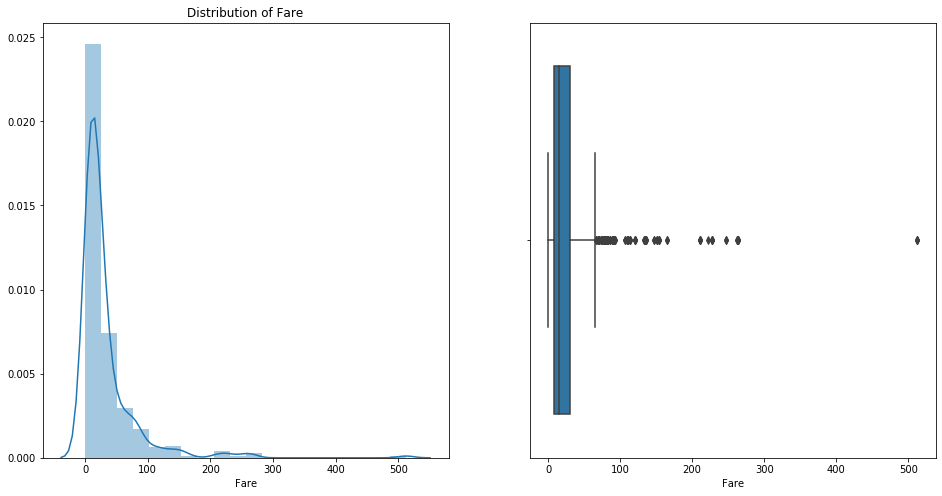

In [137]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.distplot(df_train['Fare'],ax=ax[0],bins=20)
ax[0].set_title('Distribution of Fare')
sns.boxplot(df_train['Fare'])

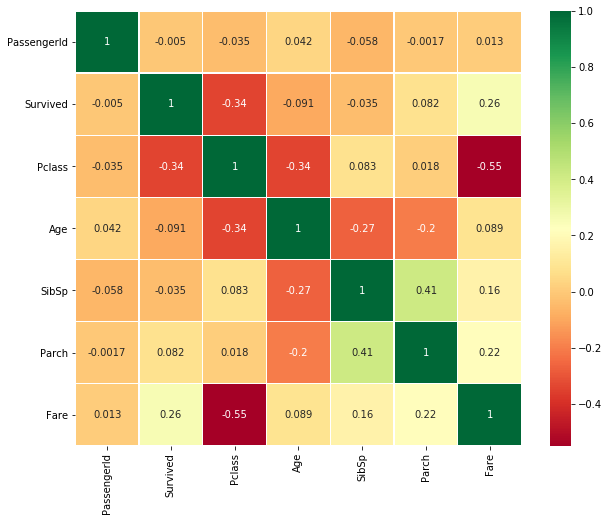

In [138]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [141]:
df_train.Ticket.isna().any()

False

In [142]:
df_test.Ticket.isna().any()

False

## Feature Engineering and Data Cleaning

In [139]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [140]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [150]:
drop_columns = ['PassengerId','Name','Ticket','Cabin']

In [151]:
df_train.drop(labels=drop_columns,axis=1,inplace=True)
df_test.drop(labels=drop_columns,axis=1,inplace=True)

In [172]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [173]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


## Remove Outliers

In [162]:
def get_index_outliers(df):
    
    top = np.percentile(df.values,75)
    bot = np.percentile(df.values,25)
    
    iqr = top-bot
    
    outliers_indexes = []
    
    for i,data in enumerate(df):
        if data > top + 1.5 * iqr or data < bot -1.5 * iqr:
            outliers_indexes.append(i)
    
    return outliers_indexes
    

In [167]:
temp1 = get_index_outliers(df_train['Fare'])

In [168]:
temp2 = get_index_outliers(df_train['Age'])

In [169]:
temp1.extend(temp2)

In [180]:
index_to_remove =list(set(temp1))

In [187]:
df_train.drop(df.index[index_to_remove],inplace=True)

In [189]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
5,0,3,male,33.0,0,0,8.4583,Q,Mr


In [191]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


## Feature Engineering

In [190]:
df_train['Age_band']=0
df_train.loc[df_train['Age']<=16,'Age_band']=0
df_train.loc[(df_train['Age']>16)&(df_train['Age']<=32),'Age_band']=1
df_train.loc[(df_train['Age']>32)&(df_train['Age']<=48),'Age_band']=2
df_train.loc[(df_train['Age']>48)&(df_train['Age']<=64),'Age_band']=3
df_train.loc[df_train['Age']>64,'Age_band']=4
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band
0,0,3,male,22.0,1,0,7.250,S,Mr,1
2,1,3,female,26.0,0,0,7.925,S,Miss,1


In [192]:
df_test['Age_band']=0
df_test.loc[df_test['Age']<=16,'Age_band']=0
df_test.loc[(df_test['Age']>16)&(df_test['Age']<=32),'Age_band']=1
df_test.loc[(df_test['Age']>32)&(df_test['Age']<=48),'Age_band']=2
df_test.loc[(df_test['Age']>48)&(df_test['Age']<=64),'Age_band']=3
df_test.loc[df_test['Age']>64,'Age_band']=4
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band
0,3,male,34.5,0,0,7.8292,Q,Mr,2
1,3,female,47.0,1,0,7.0000,S,Mrs,2


In [193]:
df_train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band


,Age_band
1,337
2,284
0,90
3,34


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


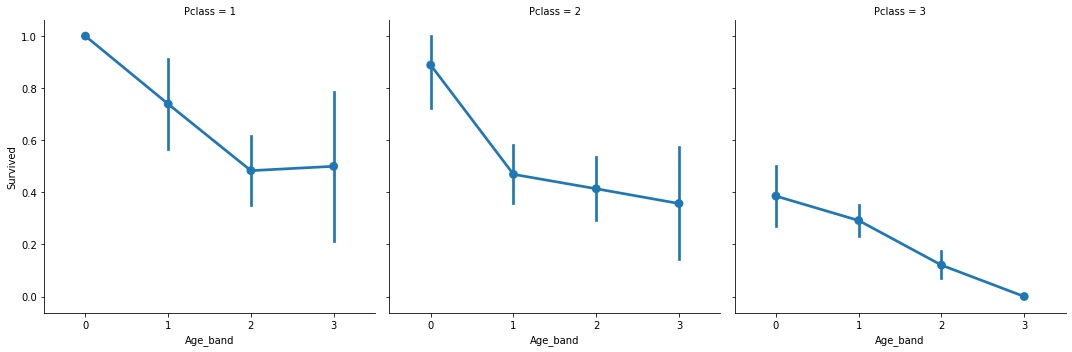

In [195]:
sns.factorplot('Age_band','Survived',data=df_train,col='Pclass')
plt.show()

In [196]:
df_train['Family_Size']=0
df_train['Family_Size']=df_train['Parch']+df_train['SibSp']#family size
df_train['Alone']=0
df_train.loc[df_train.Family_Size==0,'Alone']=1#Alone

In [197]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,0,3,male,22.0,1,0,7.2500,S,Mr,1,1,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,1,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,2,0,1
5,0,3,male,33.0,0,0,8.4583,Q,Mr,2,0,1


In [198]:
df_test['Family_Size']=0
df_test['Family_Size']=df_test['Parch']+df_test['SibSp']#family size
df_test['Alone']=0
df_test.loc[df_test.Family_Size==0,'Alone']=1#Alone

In [199]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,3,male,34.5,0,0,7.8292,Q,Mr,2,0,1
1,3,female,47.0,1,0,7.0000,S,Mrs,2,1,0
2,2,male,62.0,0,0,9.6875,Q,Mr,3,0,1
3,3,male,27.0,0,0,8.6625,S,Mr,1,0,1
4,3,female,22.0,1,1,12.2875,S,Mrs,1,2,0


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/huydao/anaconda3/envs/learn/lib/python3.7/site-p

Text(0.5, 1.0, 'Alone vs Survived')

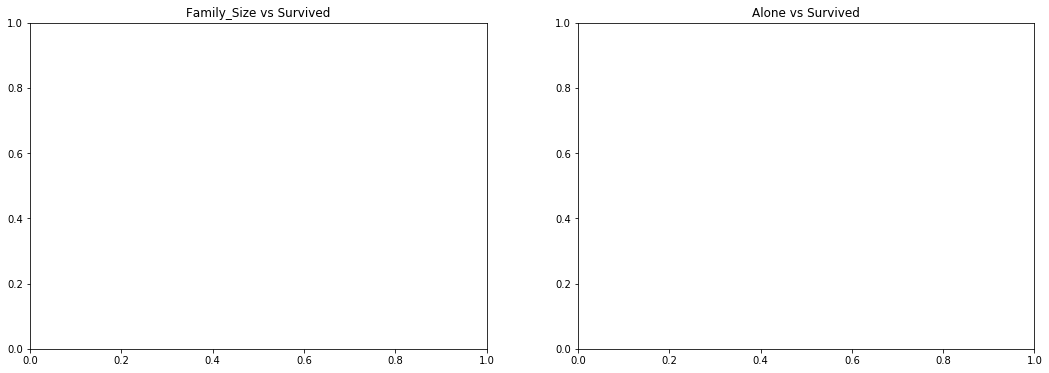

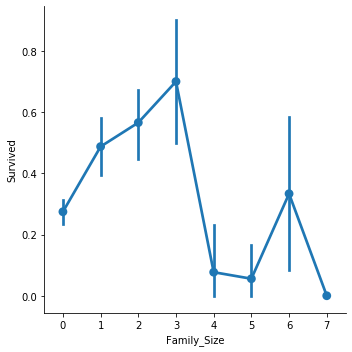

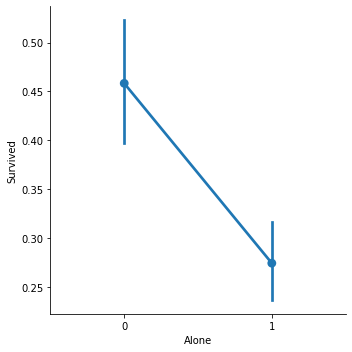

In [202]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=df_train,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=df_train,ax=ax[1])
ax[1].set_title('Alone vs Survived')

/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


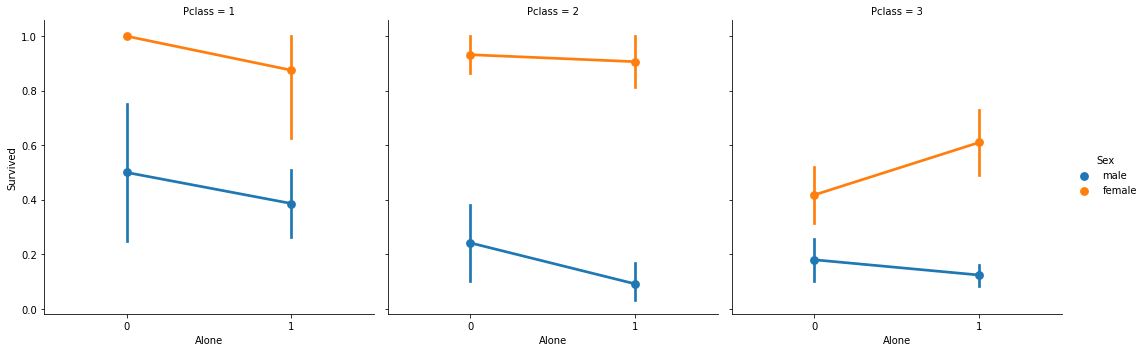

In [203]:
sns.factorplot('Alone','Survived',data=df_train,hue='Sex',col='Pclass')
plt.show()

In [204]:
df_train['Fare_Range']=pd.qcut(df_train['Fare'],4)
df_train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.896]",0.201835
"(7.896, 12.475]",0.270968
"(12.475, 26.0]",0.405797
"(26.0, 65.0]",0.503030


In [206]:
df_test['Fare_Range']=pd.qcut(df_test['Fare'],4)

In [207]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range
0,3,male,34.5,0,0,7.8292,Q,Mr,2,0,1,"(-0.001, 7.896]"
1,3,female,47.0,1,0,7.0000,S,Mrs,2,1,0,"(-0.001, 7.896]"
2,2,male,62.0,0,0,9.6875,Q,Mr,3,0,1,"(7.896, 14.454]"
3,3,male,27.0,0,0,8.6625,S,Mr,1,0,1,"(7.896, 14.454]"
4,3,female,22.0,1,1,12.2875,S,Mrs,1,2,0,"(7.896, 14.454]"


In [208]:
df_train['Fare_cat']=0
df_train.loc[df_train['Fare']<=7.91,'Fare_cat']=0
df_train.loc[(df_train['Fare']>7.91)&(df_train['Fare']<=14.454),'Fare_cat']=1
df_train.loc[(df_train['Fare']>14.454)&(df_train['Fare']<=31),'Fare_cat']=2
df_train.loc[(df_train['Fare']>31)&(df_train['Fare']<=513),'Fare_cat']=3

In [215]:
df_test['Fare_cat']=0
df_test.loc[df_test['Fare']<=7.91,'Fare_cat']=0
df_test.loc[(df_test['Fare']>7.91)&(df_test['Fare']<=14.454),'Fare_cat']=1
df_test.loc[(df_test['Fare']>14.454)&(df_test['Fare']<=31),'Fare_cat']=2
df_test.loc[(df_train['Fare']>31)&(df_test['Fare']<=513),'Fare_cat']=3

In [216]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,0,3,0,22.0,1,0,7.2500,0,0,1,1,0,"(-0.001, 7.896]",0
2,1,3,1,26.0,0,0,7.9250,0,2,1,0,1,"(7.896, 12.475]",1
3,1,1,1,35.0,1,0,53.1000,0,1,2,1,0,"(26.0, 65.0]",3
4,0,3,0,35.0,0,0,8.0500,0,0,2,0,1,"(7.896, 12.475]",1
5,0,3,0,33.0,0,0,8.4583,2,0,2,0,1,"(7.896, 12.475]",1


In [210]:
df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
df_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [211]:
df_test['Sex'].replace(['male','female'],[0,1],inplace=True)
df_test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_test['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [217]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,0,3,0,22.0,1,0,7.2500,0,0,1,1,0,"(-0.001, 7.896]",0
2,1,3,1,26.0,0,0,7.9250,0,2,1,0,1,"(7.896, 12.475]",1
3,1,1,1,35.0,1,0,53.1000,0,1,2,1,0,"(26.0, 65.0]",3
4,0,3,0,35.0,0,0,8.0500,0,0,2,0,1,"(7.896, 12.475]",1
5,0,3,0,33.0,0,0,8.4583,2,0,2,0,1,"(7.896, 12.475]",1


In [218]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,3,0,34.5,0,0,7.8292,2,0,2,0,1,"(-0.001, 7.896]",0
1,3,1,47.0,1,0,7.0000,0,1,2,1,0,"(-0.001, 7.896]",0
2,2,0,62.0,0,0,9.6875,2,0,3,0,1,"(7.896, 14.454]",1
3,3,0,27.0,0,0,8.6625,0,0,1,0,1,"(7.896, 14.454]",3
4,3,1,22.0,1,1,12.2875,0,1,1,2,0,"(7.896, 14.454]",1


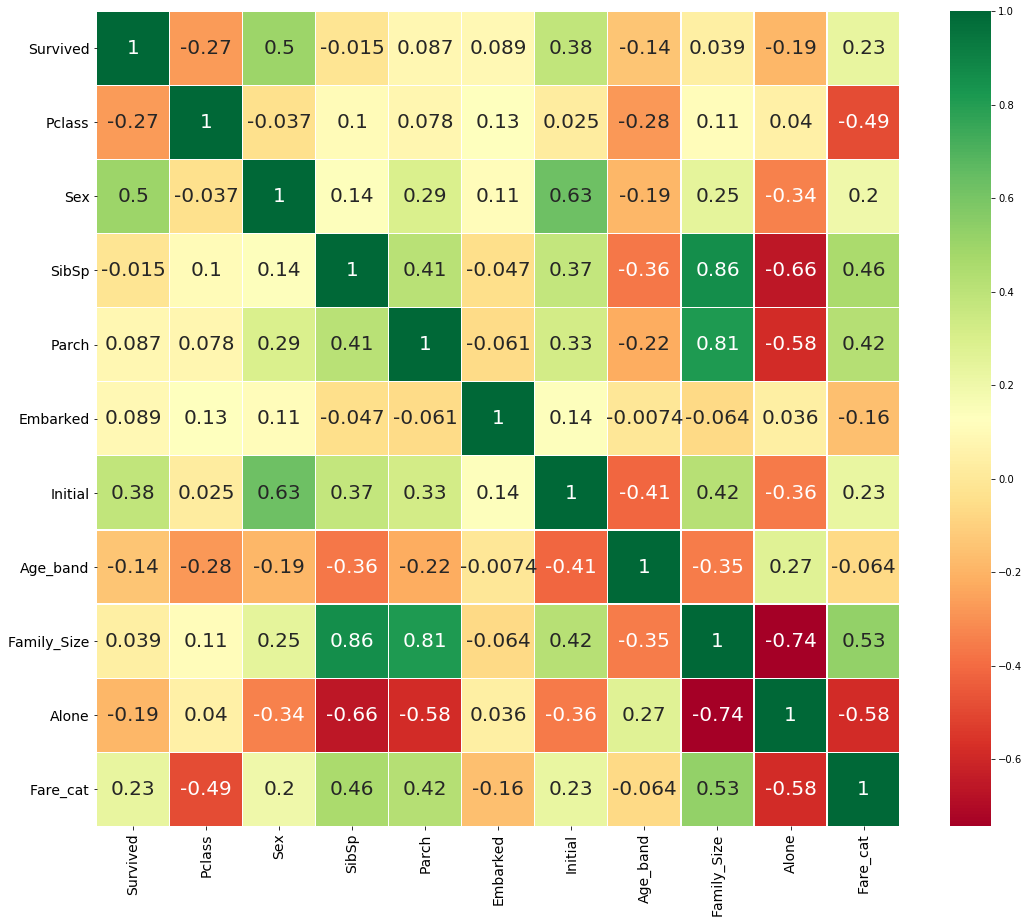

In [219]:
df_train.drop(['Age','Fare','Fare_Range'],axis=1,inplace=True)
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [220]:
df_test.drop(['Age','Fare','Fare_Range'],axis=1,inplace=True)

In [221]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1
5,0,3,0,0,0,2,0,2,0,1,1


In [222]:
df_test.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,3,0,0,0,2,0,2,0,1,0
1,3,1,1,0,0,1,2,1,0,0
2,2,0,0,0,2,0,3,0,1,1
3,3,0,0,0,0,0,1,0,1,3
4,3,1,1,1,0,1,1,2,0,1


In [223]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [225]:
train,test=train_test_split(df_train,test_size=0.3,random_state=0,stratify=df_train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df_train[df_train.columns[1:]]
Y=df_train['Survived']

In [226]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8392857142857143


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [228]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8169642857142857


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [229]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8303571428571429


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [230]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8035714285714286


In [231]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8214285714285714


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/

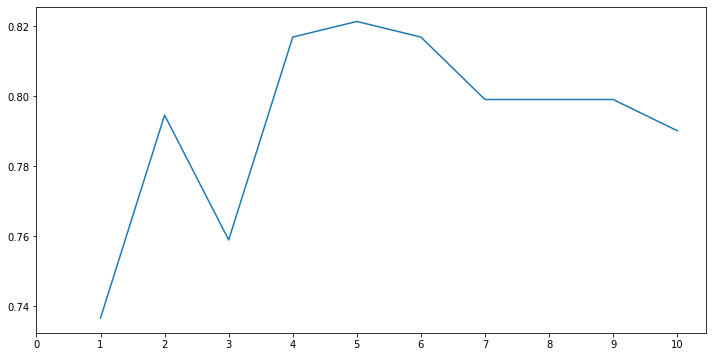

Accuracies for different values of n are: [0.73660714 0.79464286 0.75892857 0.81696429 0.82142857 0.81696429
 0.79910714 0.79910714 0.79910714 0.79017857] with the max value as  0.8214285714285714


In [232]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [233]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.7991071428571429


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [234]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8169642857142857


/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [235]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

/home/huydao/anaconda3/envs/learn/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,CV Mean,Std
Linear Svm,0.783928,0.030054
Radial Svm,0.814811,0.028876
Logistic Regression,0.796000,0.020306
KNN,0.801514,0.044810
Decision Tree,0.808162,0.029847
Naive Bayes,0.789333,0.023483
Random Forest,0.805514,0.036253


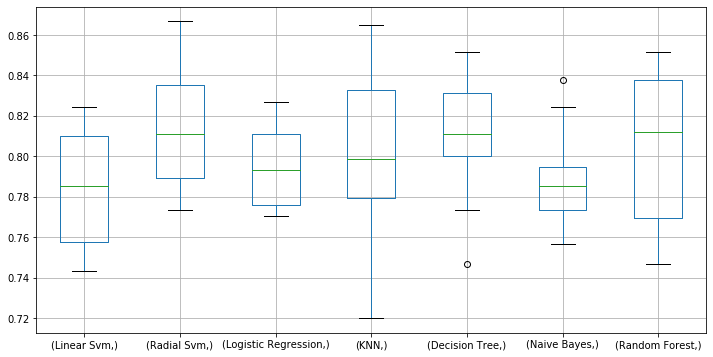

In [236]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

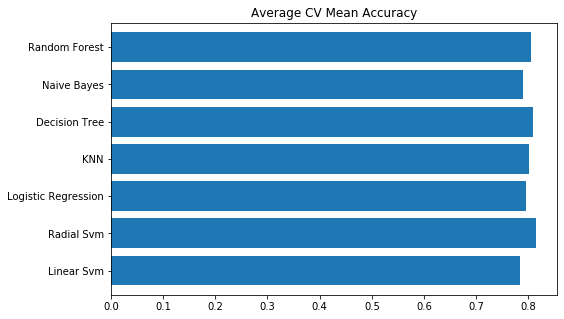

In [237]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

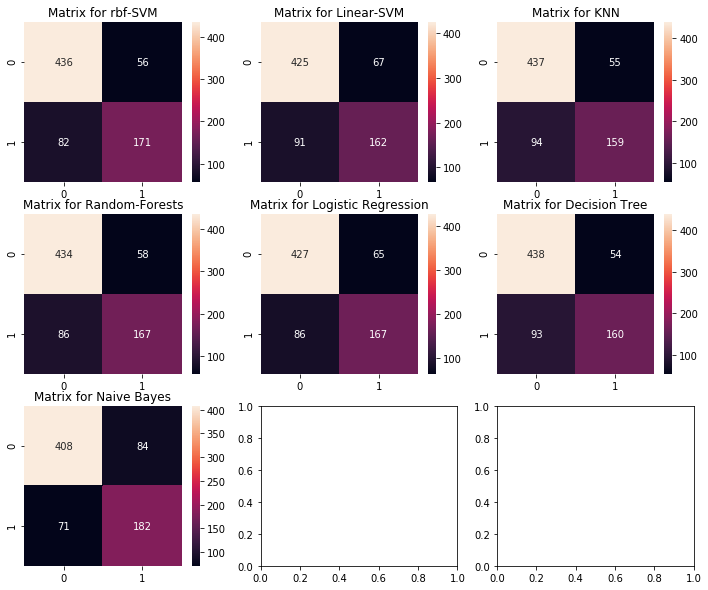

In [238]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [239]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8147651006711409
SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   11.4s finished


In [240]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   25.6s finished


0.8067114093959731
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [241]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8174414414414415


In [242]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8163243243243243


In [258]:
model = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)

In [259]:
model.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=0)

In [260]:
X_test = df_test.values

In [261]:
y_test = model.predict(X_test)

In [262]:
submit = pd.read_csv('data/titannic/test.csv')

In [263]:
submit.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [264]:
submit.drop(submit.columns[1:],axis=1,inplace=True)

In [265]:
submit['Survived'] = y_test

In [266]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [267]:
submit.to_csv('submit.csv',index=False)